# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


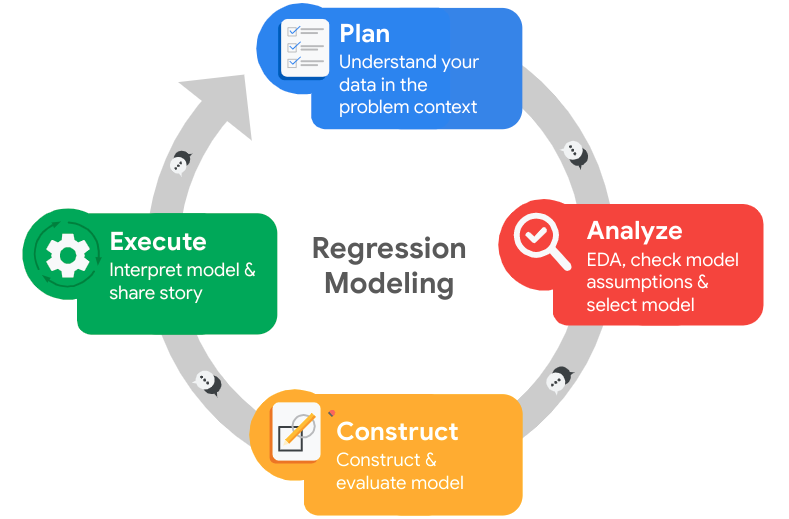

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Stakeholders of the project are the company's top management.
- The goals in this project are to analyse the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
- 25% of the data contained missing values and was therefore removed. Most of the data features are numeric, except for only two which are department and salary, which are categorical.
- After checking for outlier data, the new dataframe contained 824 data outliers in the "tenure" column. This should be no issue for decesion tree-based models, the XGB, however the Logistic Regression model is expected to be affected by them.
- Resources used throughout the project will be the company's dataset, besides python notebooks and libraries.
- Both FN and FP could prove problematic for the company. FN means the model mispredicts that an employee will not leave the company, leading the latter to not exerting necessary efforts and allocating necessary resources in order to devise the suitable policies to retain staff. On the other hand, FP means the model mispredicts that an employee will leave the company, leading the latter to dedicate unnecessary more resources for staff retention, increasing its cost accordingly. In such cases, F1 could be the most suitable score to measure the model's performance as it strikes the balance between precision and recall scores.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
hr = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [60]:
# Gather basic information about the data
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [61]:
# Gather descriptive statistics about the data
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Rename columns as needed
hr = hr.rename(columns={"Work_accident" : "work_accident", "average_montly_hours" : "avg_monthly_hrs", 
                   "time_spend_company" : "tenure", "Department" : "department"})


# Display all column names after the update
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [64]:
# Check for missing values
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [4]:
# Check for duplicates
hr.duplicated().sum()

3008

In [66]:
# Inspect some rows containing duplicates as needed
mask = hr.duplicated()
hr[mask]

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Drop duplicates and save resulting dataframe in a new variable as needed
hr2 = hr.drop_duplicates(keep='first', ignore_index=True)


# Display first few rows of new dataframe as needed
hr2.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

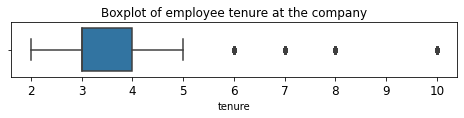

In [6]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8,1))
plt.title('Boxplot of employee tenure at the company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr2['tenure'])
plt.show()

In [79]:
# Determine the number of rows containing outliers
Q1 = hr2['tenure'].quantile(0.25)
Q3 = hr2['tenure'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
outlier_count = ((hr2['tenure'] > UL) | (hr2['tenure'] < LL)).sum()
print('Upper Limit:',UL)
print('Lower Limit:',LL)
print('Outlier Count:', outlier_count)
print('Rows with outliers:',np.where((hr2['tenure'] > UL) | (hr2['tenure'] < LL)))

Upper Limit: 5.5
Lower Limit: 1.5
Outlier Count: 824
Rows with outliers: (array([    1,    17,    34,    47,    67,    83,    99,   122,   161,
         191,   199,   204,   229,   231,   251,   269,   275,   277,
         282,   315,   327,   351,   352,   397,   399,   410,   415,
         429,   432,   481,   489,   494,   503,   514,   522,   533,
         552,   571,   576,   599,   600,   624,   627,   658,   661,
         666,   676,   717,   748,   799,   801,   832,   837,   846,
         866,   898,   912,   926,   980,  1015,  1037,  1040,  1041,
        1044,  1047,  1077,  1080,  1124,  1131,  1135,  1140,  1191,
        1255,  1277,  1302,  1343,  1346,  1372,  1374,  1376,  1399,
        1447,  1540,  1542,  1547,  1575,  1580,  1643,  1645,  1655,
        1711,  1712,  1714,  1740,  1745,  1751,  1788,  1817,  1826,
        1851,  1891,  1897,  1902,  1932,  1941,  1948,  1959,  1961,
        1972,  2003,  2008,  2015,  2064,  2082,  2086,  2106,  2115,
        2164,  2

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- There was no any linear relationship or multicollinearity observed in the data.
- Almost 17% of employess left the company, while 83% stayed. Those who left nearly represent fifth of the staff.
- EDA helps fully explore the data to have an elaborate idea about its features, for example whether it contains any missing values, data outliers, or duplicates, as well as the nature of relationship between features, i.e. the existence of any linear relationship or multicollinearity.
- The only ethical consideration thus far is to the importance of striking the balance between FNs and FPs, to minimise the company's losses in terms of staff turnover or financial resources as much as possible.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [7]:
# Get numbers of people who left vs. stayed
print(hr2['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
left_stayed_percent = round(hr2['left'].value_counts(normalize=True)*100,2)
print(left_stayed_percent)

0    10000
1     1991
Name: left, dtype: int64

0    83.4
1    16.6
Name: left, dtype: float64


Almost 17% of employess left the company, while 83% stayed. Those who left nearly represent fifth of the staff.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

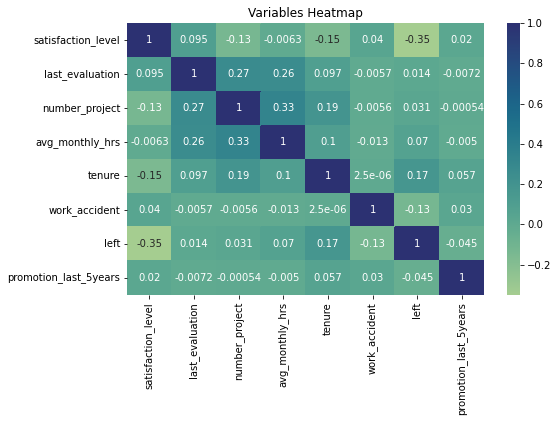

In [73]:
# Create a plot as needed
plt.figure(figsize=(8,5))
sns.heatmap(hr2[['satisfaction_level', 'last_evaluation', 'number_project','avg_monthly_hrs', 'tenure', 
                 'work_accident', 'left','promotion_last_5years', 'department', 'salary']].corr(), 
    annot=True, 
    cmap="crest")
plt.title("Variables Heatmap")
plt.show();

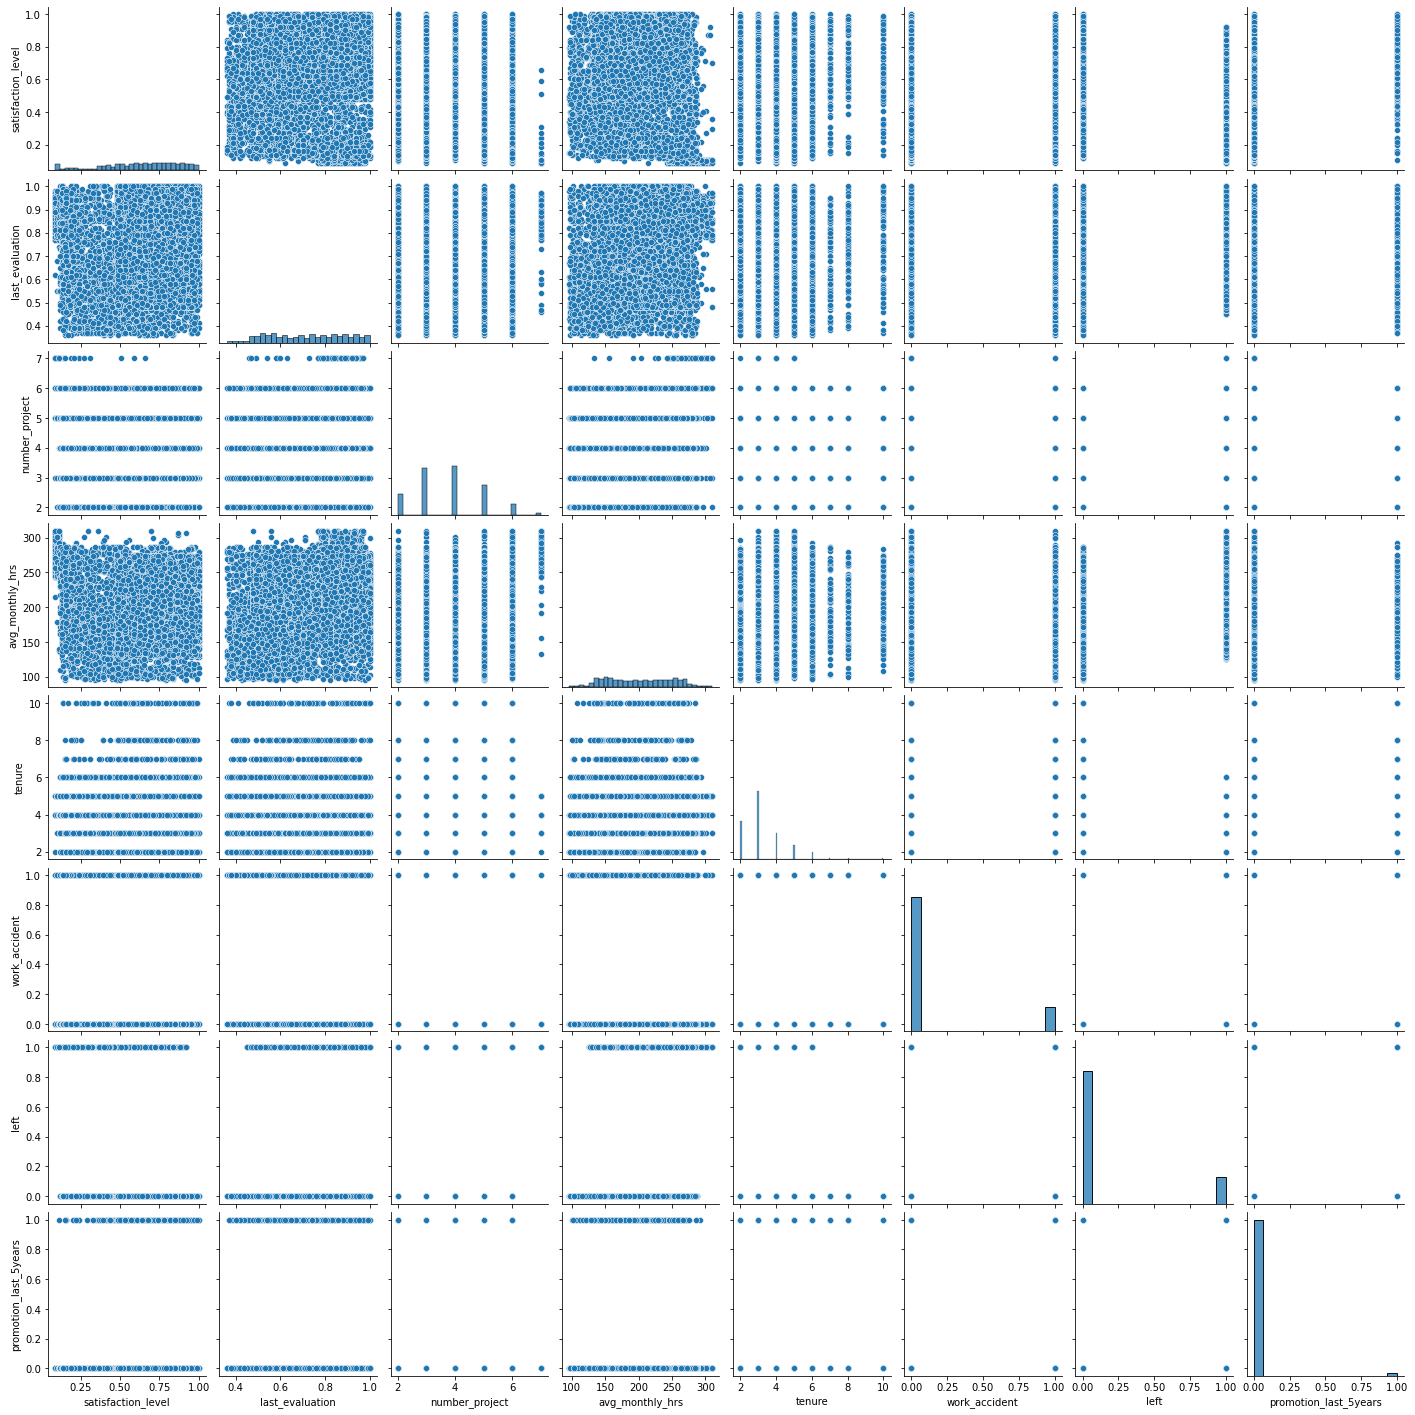

In [74]:
# Create a plot as needed
sns.pairplot(hr2);

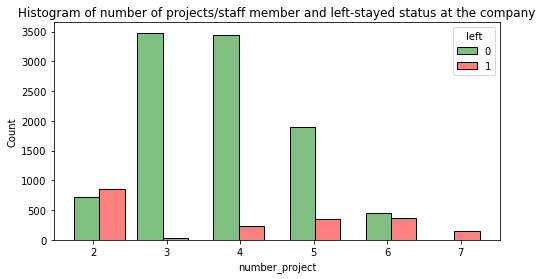

In [61]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='number_project',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=4,
             alpha=.5)
plt.title('Histogram of number of projects/staff member and left-stayed status at the company');

The above figure shows that the number of those who leave the company severely decreases when they engage three projects as compared to two projects only. 3 and 4 projects represent the highest numbers of projects engaged by those who stay, then thereafter the numbers of those who stay starts to decrease inversely with the number of projects engaged, until the latter reaches 7 projects, at which no one at the company stays. That may indicate that the maximum number of projects a staff member can engage at the company is 6.

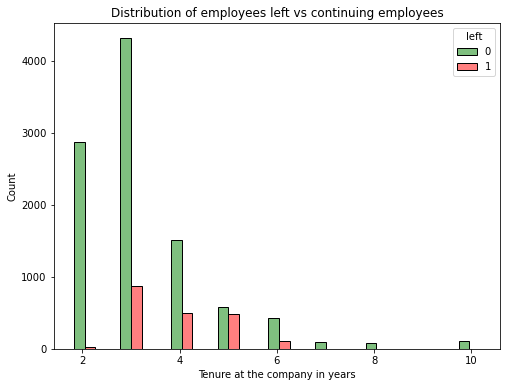

In [53]:
# Create a plot as needed
plt.figure(figsize=(8,6))
sns.histplot(data=hr2, 
             stat="count", 
             multiple="dodge", 
             x="tenure", 
             shrink=5,
             alpha=.5, 
             hue="left",
             palette={0:'green', 1:'red'},
             element="bars", legend=True)

plt.xlabel("Tenure at the company in years")
plt.ylabel("Count")
plt.title("Distribution of employees left vs continuing employees")
plt.show();

In a range of 2 to 10 years of staff tenure at the company, those who exceed 6 years stay up to ten years. Those who leave do so in between 2 to 6 years of tenure.

In [45]:
hr2[hr2['tenure']==7]['left'].value_counts()

False    94
Name: left, dtype: int64

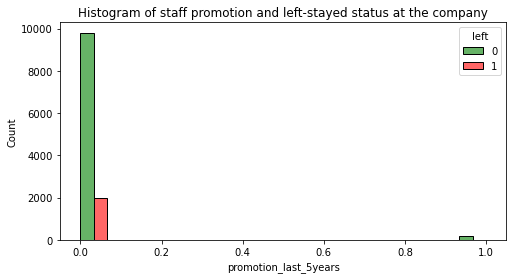

In [28]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='promotion_last_5years',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=1,
             alpha=.6)
plt.title('Histogram of staff promotion and left-stayed status at the company');

The likelihood of leaving the company increses for those who do not get promoted within the last five years.

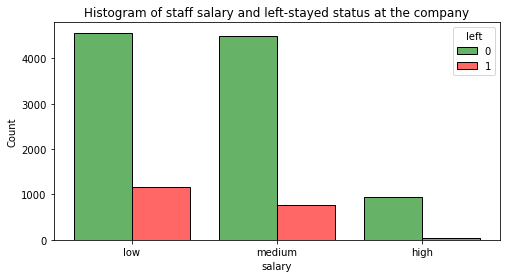

In [78]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='salary',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=0.8,
             alpha=.6)
plt.title('Histogram of staff salary and left-stayed status at the company');

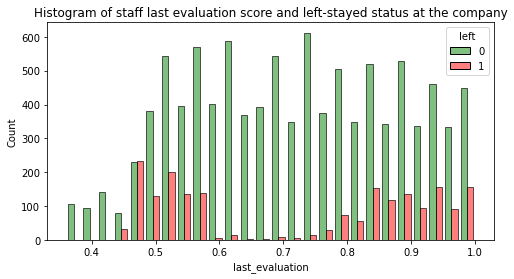

In [54]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='last_evaluation',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=0.8,
             alpha=.5)
plt.title('Histogram of staff last evaluation score and left-stayed status at the company');

The numbers of those who stay largely exceeds the numbers of those who leave in accordnace and directly with the score they attain in their last performance evaluation. The numbers of those who left largely decreased within the range of 0.6-0.75 of last evaluation, after that the numbers have risen again. However, At any given score point, the number of those who stayed was much higher than that of those who left, reaching its highest point at score point of 0.74.

In [59]:
hr2[hr2['last_evaluation']==0.74]['left'].value_counts()

False    222
True       5
Name: left, dtype: int64

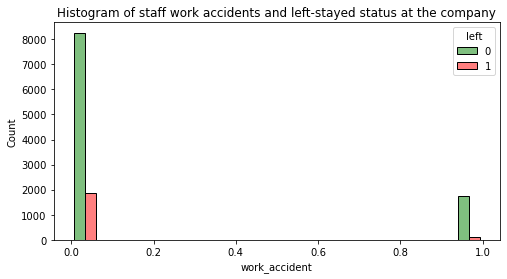

In [55]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='work_accident',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=0.8,
             alpha=.5)
plt.title('Histogram of staff work accidents and left-stayed status at the company');

Work accidents seem not to have any relationship with the staff member leaving or staying at the company. The proportion of those who left and those who stayed is almost the same, regardless of whether the employee had a workplace injury or not. However, the numbers of those who stayed remain higher than those who left.

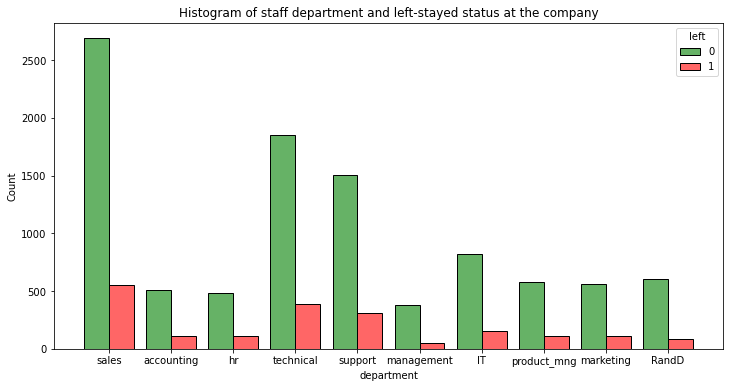

In [9]:
# Create a plot as needed
plt.figure(figsize=(12,6))
sns.histplot(data=hr2,
             x='department',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=0.8,
             alpha=.6)
plt.title('Histogram of staff department and left-stayed status at the company');

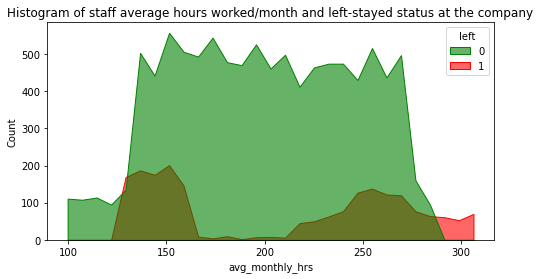

In [75]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='avg_monthly_hrs',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='layer',
             element='poly',
             shrink=0.8,
             alpha=.6)
plt.title('Histogram of staff average hours worked/month and left-stayed status at the company');

The minority of those who work around (+) or (-) 150 hours on average per month start leaving the company. The number of those who leave or stay fluctuates depending on the average number of hours worked, however those who stay largely exceed those who leave in terms of count, until the numbers of hours worked reach 288 hours and more then no one stays at the company.

In [77]:
hr2[hr2['avg_monthly_hrs']==288]['left'].value_counts()

True    6
Name: left, dtype: int64

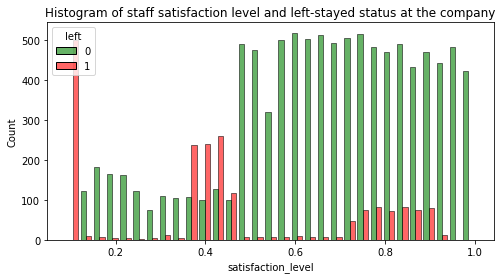

In [33]:
# Create a plot as needed
plt.figure(figsize=(8,4))
sns.histplot(data=hr2,
             x='satisfaction_level',
             hue='left',
             palette={0:'green', 1:'red'},
             multiple='dodge',
             element='bars',
             shrink=0.8,
             alpha=.6)
plt.title('Histogram of staff satisfaction level and left-stayed status at the company');

As could be expected, those who score very minimally in terms of satisfaction tend to leave the company in big numbers. The numbers of those who stay then largely exceed the numbers of those who leave when satisfaction level goes up.

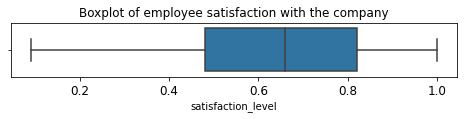

In [81]:
# Create a plot as needed
plt.figure(figsize=(8,1))
plt.title('Boxplot of employee satisfaction with the company', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr2['satisfaction_level'])
plt.show();

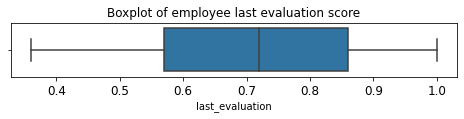

In [82]:
plt.figure(figsize=(8,1))
plt.title('Boxplot of employee last evaluation score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr2['last_evaluation'])
plt.show();

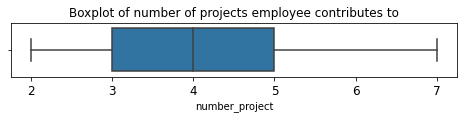

In [10]:
plt.figure(figsize=(8,1))
plt.title('Boxplot of number of projects employee contributes to', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr2['number_project'])
plt.show();

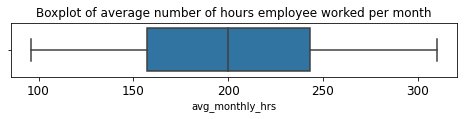

In [84]:
plt.figure(figsize=(8,1))
plt.title('Boxplot of average number of hours employee worked per month', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=hr2['avg_monthly_hrs'])
plt.show();

### Insights

[What insights can you gather from the plots you created to visualize the data?]
- There's no any multicollinearity between the features in the data.
- Only a minority of those who were not promoted within the last 5 years left the company; about 17%.
- The majority of those who leave is from those who get paid the lowest, and vice versa, i.e. the highest the salary, the lowest the turnover rate. There's a direct relationship between salary class and staff turnover.
- The highest percentage of those who left the company was among those who work for Sales, Technical, and Support departments.
- There are no outliers in the data features, except in 'tenure' which has 824 outliers.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- For both models, all of the independent features were chosen. Furthermore, outliers were dropped from 'tenure' in order for the logistic regression model to function properly, due to its known sensitivity towards outliers.
- For both models, the target variable was 'left'.
- The XGB model was found to be better than the Logistic Regression in terms of the four scores; f1, recall, precision, and accuracy. The Logistic Regression was weaker in performance with the inclusion and exclusion of 'tenure' from the model to test the effect of either on its performance.
- Ethical considerations remain the same throughout this process of model design, test, and evaluation.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It's a classification task where the model will be classifying whether an employee will leave or stay at the company.

### Identify the types of models most appropriate for this task.

Both Logistic Regression and XGBoost could be suitable for the task.

### Modeling

Add as many cells as you need to conduct the modeling process.

## First: Logistic Regression Modelling

In [80]:
X = hr2.copy()

# Drop outliers from 'tenure' to avoid affect on the model
X = X[(X['tenure'] >= LL) & (X['tenure'] <= UL)]


# Label encode 'salary'
X['salary'] = X['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

# Dummy encode 'department'
X = pd.get_dummies(X, columns=['department'], drop_first=False)
X = X.reset_index(drop=True)
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,stayed,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,True,0,1,False,...,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,True,0,2,False,...,0,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,True,0,1,False,...,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,True,0,1,False,...,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,True,0,1,False,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Isolate trarget variable
y = X['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [21]:
# Drop 'left' from X
X = X.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.41,0.50,2,153,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
print(X.shape)
print(y.shape)

(11167, 18)
(11167,)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [25]:
# Get shape of each training, validation, and testing set
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((8375, 18), (2792, 18), (2792,), (8375,))

In [26]:
# Construct a logistic regression model and fit it to the training set
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)

In [27]:
# Use the logistic regression model to get predictions on the encoded testing set
log_y_pred = log_clf.predict(X_test)
log_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Display the true labels of the testing set
y_test

3568    0
5269    0
9764    0
2587    0
3689    0
       ..
6704    0
4923    0
5228    0
7601    0
569     1
Name: left, Length: 2792, dtype: int64

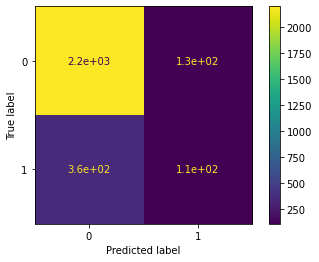

In [29]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, log_y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show();

In [30]:
# Create classification report for logistic regression model
target_labels = ['0', '1']
print(classification_report(y_test, log_y_pred, target_names=target_labels))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2321
           1       0.47      0.24      0.32       471

    accuracy                           0.83      2792
   macro avg       0.67      0.59      0.61      2792
weighted avg       0.79      0.83      0.80      2792



In [33]:
from sklearn import metrics
# Get scores for the logistic regression model.

### YOUR CODE HERE ###
log_accuracy = 0.83*100
print('accuracy score:', log_accuracy,'%')


log_precision = 0.79*100
print('precision score:', log_precision,'%')


log_recall = 0.83*100
print('recall score:', log_recall,'%')


log_f1 = 0.80*100
print('f1 score:', log_f1,'%')

accuracy score: 83.0 %
precision score: 79.0 %
recall score: 83.0 %
f1 score: 80.0 %


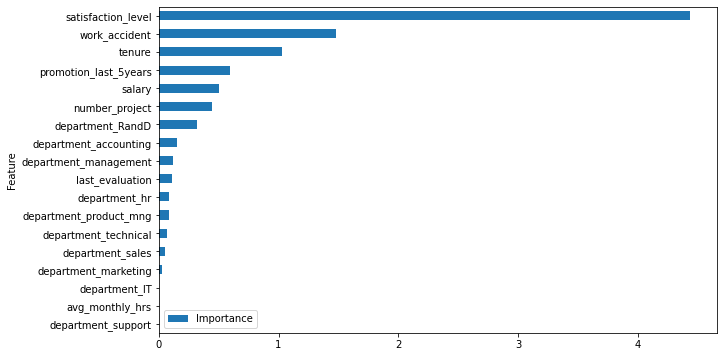

In [61]:
# Plot the relative feature importance of the predictors in the Logistic Regression model.

coefficients = log_clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

## Second: XGBoost model

In [36]:
y = hr2['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [37]:
X = hr2.copy()

# Drop unnecessary columns
X = X.drop(['left'], axis=1)


# Label encode 'salary'
X['salary'] = X['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

# Dummy encode 'department'
X = pd.get_dummies(X, columns=['department'], drop_first=False)
X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0


In [38]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [39]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [40]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7194, 18), (2398, 18), (2399, 18), (7194,), (2398,), (2399,))

In [41]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [42]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 8min 34s, sys: 4.01 s, total: 8min 38s
Wall time: 4min 19s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [43]:
xgb_cv.best_score_

0.9442271713395967

In [44]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 500}

In [45]:
#Evaluate XGBoost model
xgb_y_pred = xgb_cv.best_estimator_.predict(X_val)
xgb_y_pred

array([0, 0, 1, ..., 0, 0, 0])

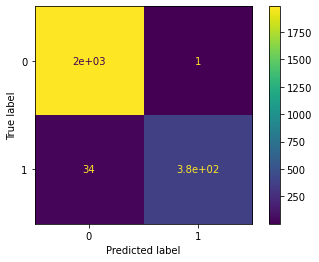

In [46]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_val, xgb_y_pred)

# Create display of confusion matrix
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
xgb_disp.plot()

# Display plot
plt.show();

In [47]:
# Create a classification report
target_labels = ['0', '1']
print(classification_report(y_val, xgb_y_pred, target_names=target_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1984
           1       1.00      0.92      0.96       414

    accuracy                           0.99      2398
   macro avg       0.99      0.96      0.97      2398
weighted avg       0.99      0.99      0.99      2398



In [48]:
xgb_accuracy = 0.99*100
print('accuracy score:', xgb_accuracy,'%')


xgb_precision = 0.99*100
print('precision score:', xgb_precision,'%')


xgb_recall = 0.99*100
print('recall score:', xgb_recall,'%')


xgb_f1 = 0.99*100
print('f1 score:', xgb_f1,'%')

accuracy score: 99.0 %
precision score: 99.0 %
recall score: 99.0 %
f1 score: 99.0 %


## Third: Use champion model to predict on test data 

In [49]:
# Use champion model to predict on test data
y_pred = xgb_cv.best_estimator_.predict(X_test)

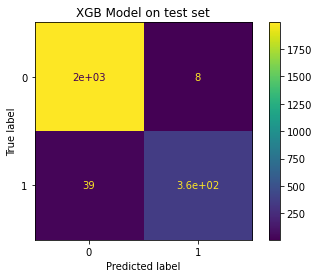

In [50]:
# Compute values for confusion matrix
cn_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
cn_disp = ConfusionMatrixDisplay(confusion_matrix=cn_cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
cn_disp.plot()

# Display plot
plt.title('XGB Model on test set');
plt.show()

In [51]:
# Create a classification report
target_labels = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.98      0.90      0.94       398

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [52]:
cn_accuracy = 0.98*100
print('accuracy score:', cn_accuracy,'%')


cn_precision = 0.98*100
print('precision score:', cn_precision,'%')


cn_recall = 0.98*100
print('recall score:', cn_recall,'%')


cn_f1 = 0.98*100
print('f1 score:', cn_f1,'%')

accuracy score: 98.0 %
precision score: 98.0 %
recall score: 98.0 %
f1 score: 98.0 %


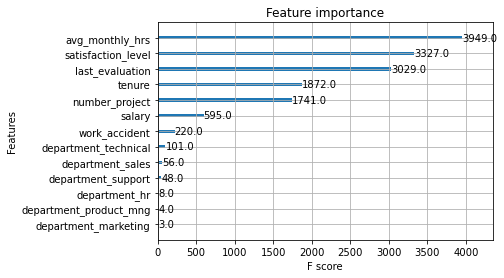

In [53]:
# Plot the relative feature importance of the predictor variables in the champion model.

plot_importance(xgb_cv.best_estimator_);

In [54]:
# Create a table of results to compare model performance.

table = pd.DataFrame()
table = table.append({'Model': "Logistic Regression",
                        'F1':  log_f1,
                        'Recall': log_recall,
                        'Precision': log_precision,
                        'Accuracy': log_accuracy
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "XGBoost",
                        'F1':  xgb_f1,
                        'Recall': xgb_recall,
                        'Precision': xgb_precision,
                        'Accuracy': xgb_accuracy
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Champion (XGB)",
                        'F1':  cn_f1,
                        'Recall': cn_recall,
                        'Precision': cn_precision,
                        'Accuracy': cn_accuracy
                      },
                        ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,80.0,83.0,79.0,83.0
1,XGBoost,99.0,99.0,99.0,99.0
2,Champion (XGB),98.0,98.0,98.0,98.0


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

### Conclusion, Recommendations, Next Steps
### Conclusions and model results:
- Two models were designed, Logistic Regression and XGBoost. The first performed very well as measured by the four scores of precision, recall, F1, and accuracy. The lowest score it achieved in all of them was in Precision which was 79%. The second model performed outstandingly good where in each of the four scores it scored no less than 99%.
- Accordingly, the winning model was tested on the test data and it attained 98% in each of the four scores. Further emphasising the very good results achieved earlier by the same model (XGB) when it was validated.
- In terms of FP and FN classification, i.e. staff members who were misclassified by the models that will leave or stay at the company, again the XGB was found to be the best. Compared to the Logistic Regression which attained 130 FPs and 360 FNs, the XGB generated only 1 FP and 34 FNs, and when finally tested, it got only 8 FPs and 39 FNs.
- Most important predictors for the XGB model that were found to have the strongest ability to predict whether a staff member will leave or stay were average monthly hours, satisfaction level, and last evaluation. It is therefore recommended to further study these strongest 3 predictors and see how modifying or improving them could lead to a lower staff turnover and increase staff retention.

### Recommendations
#### In order to increase staff retention and decrease turnover, the following procedures are recommended for consideration by the comapny's top management:

- Limit the number of projects engaged by an employee to 4 projects maximum.
- Revise promotion terms and scheme in order to guarantee timely promotion for those who earn it.
- Limit the number of hours worked by an employee per month to less than 288 hours.
- Review the current scale of wages and salaries at the company with the aim of increasing them.
- Introduce measures to make work at certain departments at the company, such as Sales, Technical, and Support more satisfactory and encouraging.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.